
# Plotting Wind Direction Using Quiver

This example demonstrates using quiver to plot wind speed contours and wind
direction arrows from wind vector component input data. The vector components
are co-located in space in this case.

For the second plot, the data used for the arrows is normalised to produce
arrows with a uniform size on the plot.


In [1]:
%matplotlib inline

In [1]:
#conda install -c conda-forge iris-sample-data

C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\iris\fileformats\pp.py:1574: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  self._t1 = cftime.datetime(
C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\iris\fileformats\pp.py:1609: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  self._t2 = cftime.datetime(


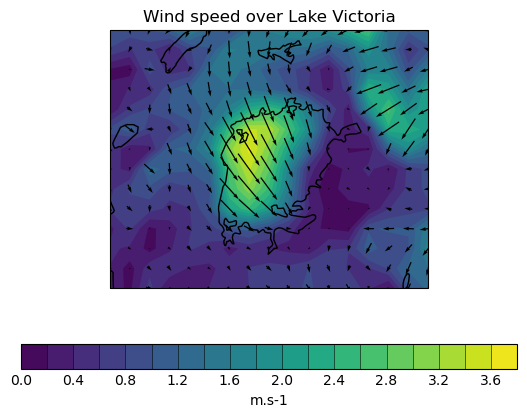

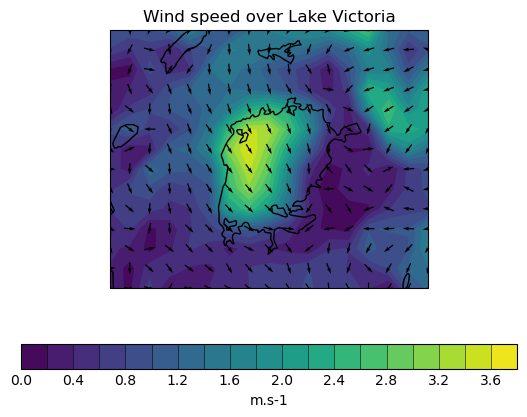

In [7]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
import numpy as np

import iris
import iris.coord_categorisation
import iris.quickplot as qplt


def main():
    # Load the u and v components of wind from a pp file
    infile = iris.sample_data_path("wind_speed_lake_victoria.pp")
    #infile = xr.open_dataset('D:/Folder_2023/Research/Africa_Research/Ronald_wind/600hpa/file1.nc')
    uwind = iris.load_cube(infile, "x_wind")
    vwind = iris.load_cube(infile, "y_wind")

    ulon = uwind.coord("longitude")
    vlon = vwind.coord("longitude")

    # The longitude points go from 180 to 540, so subtract 360 from them
    ulon.points = ulon.points - 360.0
    vlon.points = vlon.points - 360.0

    # Create a cube containing the wind speed
    windspeed = (uwind ** 2 + vwind ** 2) ** 0.5
    windspeed.rename("windspeed")

    x = ulon.points
    y = uwind.coord("latitude").points
    u = uwind.data
    v = vwind.data

    # Set up axes to show the lake
    lakes = cfeat.NaturalEarthFeature(
        "physical", "lakes", "50m", facecolor="none"
    )

    plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(lakes)

    # Get the coordinate reference system used by the data
    transform = ulon.coord_system.as_cartopy_projection()

    # Plot the wind speed as a contour plot
    qplt.contourf(windspeed, 20)

    # Add arrows to show the wind vectors
    plt.quiver(x, y, u, v, pivot="middle", transform=transform)

    plt.title("Wind speed over Lake Victoria")
    qplt.show()

    # Normalise the data for uniform arrow size
    u_norm = u / np.sqrt(u ** 2.0 + v ** 2.0)
    v_norm = v / np.sqrt(u ** 2.0 + v ** 2.0)

    plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(lakes)

    qplt.contourf(windspeed, 20)

    plt.quiver(x, y, u_norm, v_norm, pivot="middle", transform=transform)

    plt.title("Wind speed over Lake Victoria")
    qplt.show()


if __name__ == "__main__":
    main()